## Import Library

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [21]:
df = pd.read_excel('Airlines+Data.xlsx',index_col=0,parse_dates=True) 
df.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [22]:
df.tail()

,Passengers
Month,
2002-08-01,405
2002-09-01,355
2002-10-01,306
2002-11-01,271
2002-12-01,306


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [24]:
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


## Spliting DataFrame

In [39]:
train_data = df.iloc[:72] 
test_data = df.iloc[72:]

In [40]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train_data['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [41]:
96-72


24

In [42]:
len(train_data)

72

In [43]:
len(test_data)

24

## Prediction

In [44]:
test_predictions = fitted_model.forecast(24).rename('HW Forecast')

In [45]:
test_predictions

2001-01-01    233.064999
2001-02-01    234.636884
2001-03-01    274.649868
2001-04-01    264.205321
2001-05-01    263.843108
2001-06-01    293.361884
2001-07-01    324.747792
2001-08-01    327.242608
2001-09-01    290.985487
2001-10-01    257.688409
2001-11-01    226.697786
2001-12-01    257.567281
2002-01-01    261.605522
2002-02-01    263.369895
2002-03-01    308.282764
2002-04-01    296.559205
2002-05-01    296.152636
2002-06-01    329.286203
2002-07-01    364.515547
2002-08-01    367.315871
2002-09-01    326.618799
2002-10-01    289.244249
2002-11-01    254.458596
2002-12-01    289.108288
Freq: MS, Name: HW Forecast, dtype: float64

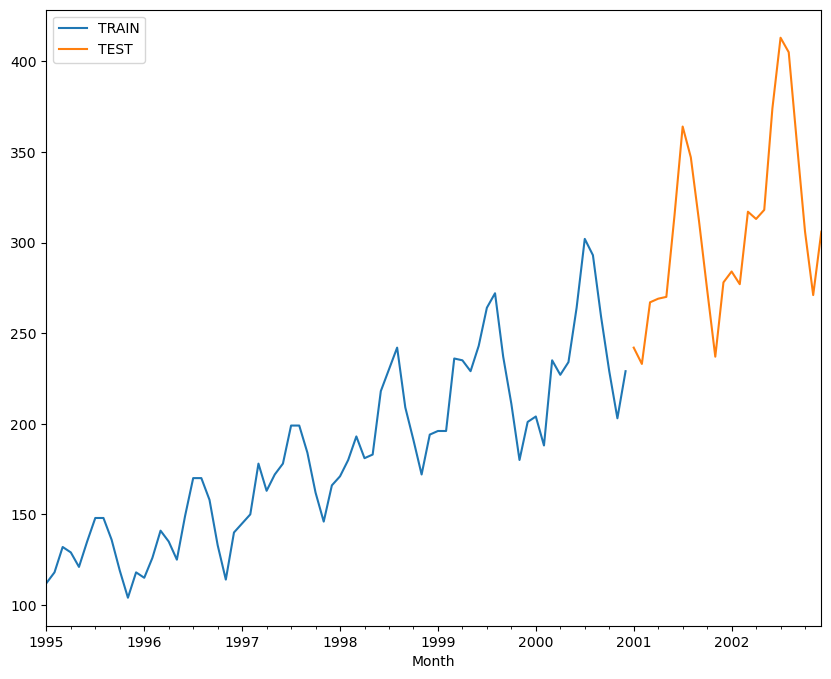

In [46]:
train_data['Passengers'].plot(legend=True,label='TRAIN')
test_data['Passengers'].plot(legend=True,label='TEST',figsize=(10,8));

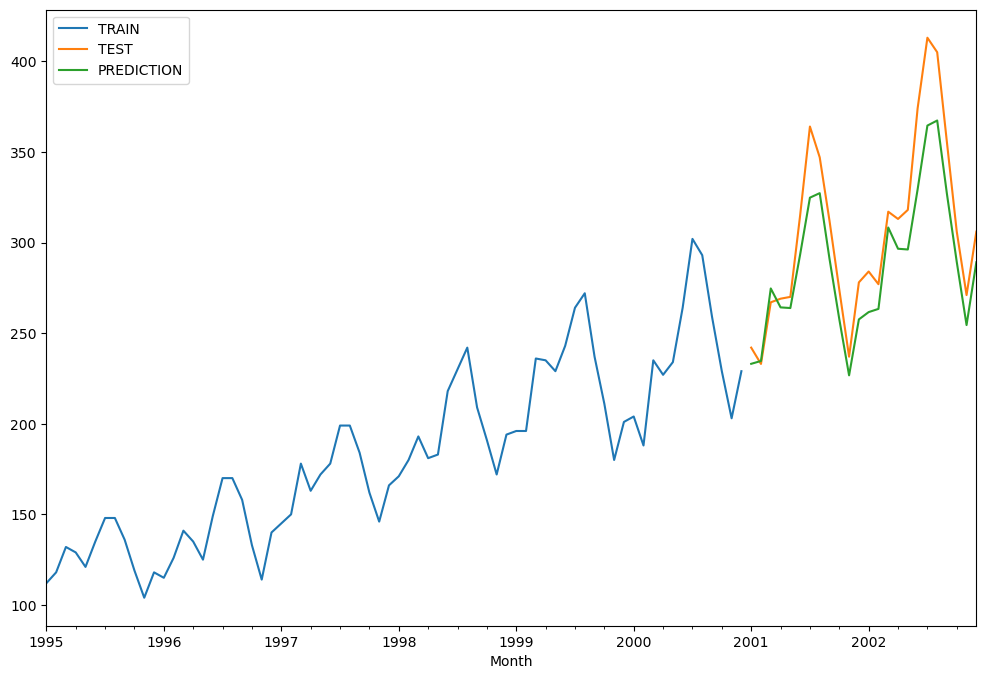

In [47]:
train_data['Passengers'].plot(legend=True,label='TRAIN')
test_data['Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');

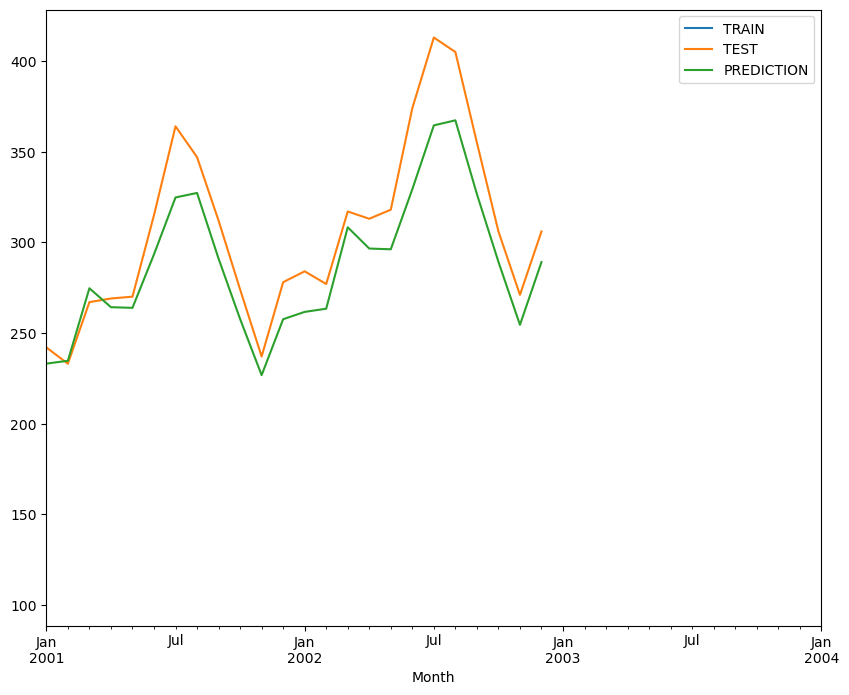

In [48]:
train_data['Passengers'].plot(legend=True,label='TRAIN')
test_data['Passengers'].plot(legend=True,label='TEST',figsize=(10,8))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['2001-01-01','2004-01-01']);

## Evaluation Metrics

In [49]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [50]:
mean_absolute_error(test_data,test_predictions)

19.59852095944507

In [51]:
mean_squared_error(test_data,test_predictions)

531.6159577677239

In [52]:
np.sqrt(mean_squared_error(test_data,test_predictions))

23.05679851513917

## Forecasting into Future

In [54]:
final_model = ExponentialSmoothing(df['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [55]:
forecast_predictions = final_model.forecast(36)

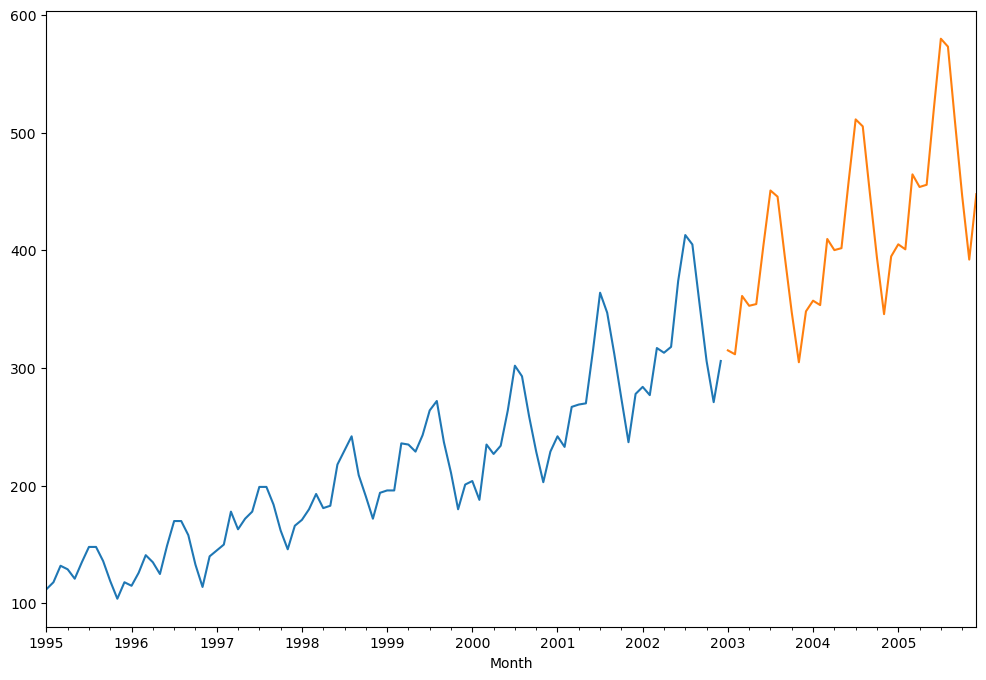

In [57]:
df['Passengers'].plot(figsize=(12,8))
forecast_predictions.plot();